# HERE we are going to indicate y = ax+b
## where y is depedent variable 
## x is indepent varible 

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
X = np.arange(0.0,5.0,0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

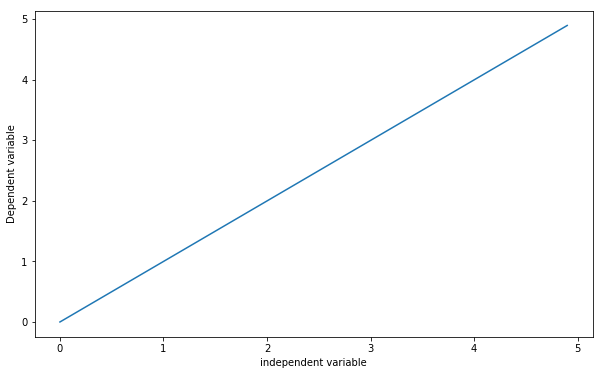

In [3]:
a=1
b=0

Y = a*X+b

plt.plot(X,Y)
plt.ylabel("Dependent variable")
plt.xlabel("independent variable")
plt.show()

# linear regersion using tensorflow


In [4]:
x_data = np.random.rand(100).astype(np.float32)


In [5]:
y_data = x_data * 3 + 2

In [6]:
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [7]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b


In [8]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [10]:
init = tf.global_variables_initializer()
sess  = tf.Session()
sess.run(init)

In [11]:
train_data = []
for step in range(100):
    evals  = sess.run([train,a,b])[1:]
    if step %5 == 0:
        print(step,evals)
        train_data.append(evals)

0 [2.720006, 3.0896885]
5 [2.4746428, 2.294744]
10 [2.5987089, 2.2260258]
15 [2.6926589, 2.1717246]
20 [2.7645569, 2.1301763]
25 [2.8195765, 2.0983815]
30 [2.8616798, 2.0740507]
35 [2.8938992, 2.0554318]
40 [2.918555, 2.0411837]
45 [2.937423, 2.0302806]
50 [2.9518611, 2.0219369]
55 [2.9629102, 2.0155518]
60 [2.9713655, 2.0106659]
65 [2.9778357, 2.0069268]
70 [2.9827869, 2.0040655]
75 [2.9865761, 2.0018759]
80 [2.9894757, 2.0002003]
85 [2.9916947, 1.9989179]
90 [2.9933925, 1.9979368]
95 [2.9946918, 1.9971859]


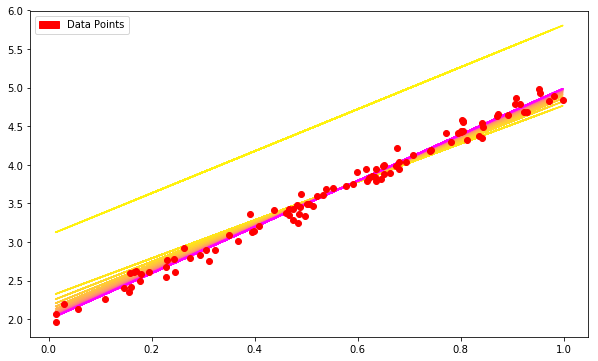

In [12]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])
plt.show()



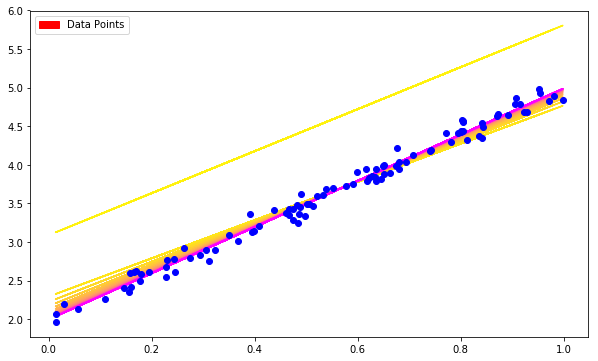

In [13]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y,)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data,'bo')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])
plt.show()

In [16]:
import tflearn


In [22]:
import speech_recognition as sr

# obtain audio from the microphone
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    audio = r.listen(source)

# recognize speech using Sphinx
try:
    print("Sphinx thinks you said " + r.recognize_sphinx(audio))
except sr.UnknownValueError:
    print("Sphinx could not understand audio")
except sr.RequestError as e:
    print("Sphinx error; {0}".format(e))

# recognize speech using Google Speech Recognition
try:
    # for testing purposes, we're just using the default API key
    # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
    # instead of `r.recognize_google(audio)`
    print("Google Speech Recognition thinks you said " + r.recognize_google(audio))
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))

# recognize speech using Google Cloud Speech
GOOGLE_CLOUD_SPEECH_CREDENTIALS = r"""INSERT THE CONTENTS OF THE GOOGLE CLOUD SPEECH JSON CREDENTIALS FILE HERE"""
try:
    print("Google Cloud Speech thinks you said " + r.recognize_google_cloud(audio, credentials_json=GOOGLE_CLOUD_SPEECH_CREDENTIALS))
except sr.UnknownValueError:
    print("Google Cloud Speech could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Cloud Speech service; {0}".format(e))

# recognize speech using Wit.ai
WIT_AI_KEY = "INSERT WIT.AI API KEY HERE"  # Wit.ai keys are 32-character uppercase alphanumeric strings
try:
    print("Wit.ai thinks you said " + r.recognize_wit(audio, key=WIT_AI_KEY))
except sr.UnknownValueError:
    print("Wit.ai could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Wit.ai service; {0}".format(e))

# recognize speech using Microsoft Bing Voice Recognition
BING_KEY = "INSERT BING API KEY HERE"  # Microsoft Bing Voice Recognition API keys 32-character lowercase hexadecimal strings
try:
    print("Microsoft Bing Voice Recognition thinks you said " + r.recognize_bing(audio, key=BING_KEY))
except sr.UnknownValueError:
    print("Microsoft Bing Voice Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Microsoft Bing Voice Recognition service; {0}".format(e))

# recognize speech using Houndify
HOUNDIFY_CLIENT_ID = "INSERT HOUNDIFY CLIENT ID HERE"  # Houndify client IDs are Base64-encoded strings
HOUNDIFY_CLIENT_KEY = "INSERT HOUNDIFY CLIENT KEY HERE"  # Houndify client keys are Base64-encoded strings
try:
    print("Houndify thinks you said " + r.recognize_houndify(audio, client_id=HOUNDIFY_CLIENT_ID, client_key=HOUNDIFY_CLIENT_KEY))
except sr.UnknownValueError:
    print("Houndify could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Houndify service; {0}".format(e))

# recognize speech using IBM Speech to Text
IBM_USERNAME = "INSERT IBM SPEECH TO TEXT USERNAME HERE"  # IBM Speech to Text usernames are strings of the form XXXXXXXX-XXXX-XXXX-XXXX-XXXXXXXXXXXX
IBM_PASSWORD = "INSERT IBM SPEECH TO TEXT PASSWORD HERE"  # IBM Speech to Text passwords are mixed-case alphanumeric strings
try:
    print("IBM Speech to Text thinks you said " + r.recognize_ibm(audio, username=IBM_USERNAME, password=IBM_PASSWORD))
except sr.UnknownValueError:
    print("IBM Speech to Text could not understand audio")
except sr.RequestError as e:
    print("Could not request results from IBM Speech to Text service; {0}".format(e))

Say something!
Sphinx error; missing PocketSphinx module: ensure that PocketSphinx is set up correctly.
Google Speech Recognition thinks you said hey what are you doing


AssertionError: ``credentials_json`` must be ``None`` or a valid JSON string

In [19]:
import speech_recognition as sr